# 0.データ読み込み

全解析で共通のデータフレームをここで読み込む。  
このDFを基本とし各解析ごとに不要な列の削除やdropを行うが、そのDropは次の解析には持ち越さず。毎回やり直す。

異常値の処理についても、上記の対応に同じ。各解析の中で異常値の行を落としても、他の解析で同行の異なる列のデータを利用する場合もあるので、全体には影響させないようにする。

この解析では113圃場の分析だけで良いから収量でドロップする

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [2]:
# soil_data = pd.read_csv('/workspaces/akita_daizu/data/113_predyield+fielddata.csv')

In [3]:
# soil_data.to_csv('/workspaces/akita_daizu/data/to_csv_out.csv')

In [2]:
soil_data = pd.read_csv('/workspaces/akita_daizu/474+113+コメントkml化する前.csv')

In [3]:
soil_data = soil_data.dropna(subset=['予測_収量'])

In [4]:
soil_data.columns

Index(['Unnamed: 0', 'id', 'Address', 'CityCode', 'Address_2', 'LandCatego',
       'Area', '耕地面積', 'uniqueID', '作付年_y', 'H23以前_y', '播種月日', 'pred_labels',
       '土壌硬度_1_mean', '土壌硬度_2_mean', '土壌硬度_3_mean', '土壌硬度_4_mean',
       '土壌硬度_5_mean', '土壌硬度_6_mean', '土壌硬度_7_mean', '土壌硬度_8_mean',
       '土壌硬度_9_mean', '土壌硬度_10_mean', '土壌硬度_11_mean', '土壌硬度_12_mean',
       '土壌硬度_13_mean', '土壌硬度_14_mean', '土壌硬度_15_mean', '土壌硬度_16_mean',
       '土壌硬度_17_mean', '土壌硬度_18_mean', '土壌硬度_19_mean', '土壌硬度_20_mean',
       '土壌硬度_21_mean', '土壌硬度_22_mean', '土壌硬度_23_mean', '土壌硬度_24_mean',
       '土壌硬度_25_mean', '土壌硬度_26_mean', '土壌硬度_27_mean', '土壌硬度_28_mean',
       '土壌硬度_29_mean', '土壌硬度_30_mean', '土壌硬度_31_mean', '土壌硬度_32_mean',
       '土壌硬度_33_mean', '土壌硬度_34_mean', '土壌硬度_35_mean', '土壌硬度_36_mean',
       '土壌硬度_37_mean', '土壌硬度_38_mean', '土壌硬度_39_mean', '土壌硬度_40_mean',
       '土壌硬度_41_mean', '土壌硬度_42_mean', '土壌硬度_43_mean', '土壌硬度_44_mean',
       '土壌硬度_45_mean', '土壌硬度_46_mean', '土壌硬度_47_mean', '土壌硬度_48_mean',
  

今後この値をSoil_dataそのものはDropせず、必要な列を抽出して作業する

In [5]:
print(soil_data.isnull().sum())

Unnamed: 0     0
id             0
Address        0
CityCode       0
Address_2      0
              ..
作付け開始年         0
geometry_x     0
予測_収量          0
土壌種類           0
COMMENT       89
Length: 97, dtype: int64


# 1.収量と各パラメータの相関分析

## 1-1 全体の相関について

In [6]:
# 表示順序変える
# soil_data_wo_error.columns
soil_data_wo_error_sort = soil_data[['予測_収量','15%反収現物重量kg/10a','土壌硬度_10_mean','土壌硬度_40_mean','播種月日', '実験室測定_EC(㎳／㎝)',
       '実験室測定_pH', 'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)',
       '可給隊窒素(mgN/100g)', '有効態リン酸(mgP2O5/100g)', 'TC(%)', '腐食(%)', 'TN(%)','作付け開始年','土壌種類']]

In [7]:
corr = soil_data_wo_error_sort.corr()

In [8]:
corr

,予測_収量,15%反収現物重量kg/10a,土壌硬度_10_mean,土壌硬度_40_mean,播種月日,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TC(%),腐食(%),TN(%),作付け開始年
予測_収量,1.000000,0.939058,-0.057461,-0.154831,-0.377272,0.212218,0.070632,0.045050,0.085611,0.056815,0.093290,-0.024501,-0.024250,-0.036111,-0.114014
15%反収現物重量kg/10a,0.939058,1.000000,-0.322973,-0.429049,-0.416017,0.083840,0.273339,0.093507,0.099933,-0.181972,0.034263,-0.359270,-0.359246,-0.361565,-0.342801
土壌硬度_10_mean,-0.057461,-0.322973,1.000000,0.092345,0.007802,0.114471,-0.068295,-0.255751,0.004724,0.286263,0.009747,0.152351,0.152316,0.189834,0.202408
土壌硬度_40_mean,-0.154831,-0.429049,0.092345,1.000000,-0.022003,0.178187,-0.211194,-0.028602,0.047168,0.062464,0.064538,0.218493,0.218531,0.225328,0.021177
播種月日,-0.377272,-0.416017,0.007802,-0.022003,1.000000,-0.580348,0.471733,-0.145888,-0.457861,-0.371374,-0.353526,-0.270814,-0.270875,-0.372598,0.021528
実験室測定_EC(㎳／㎝),0.212218,0.083840,0.114471,0.178187,-0.580348,1.000000,-0.596251,0.137055,0.505118,0.355975,0.277744,0.541995,0.542086,0.611209,-0.056051
実験室測定_pH,0.070632,0.273339,-0.068295,-0.211194,0.471733,-0.596251,1.000000,-0.088318,-0.319580,-0.409891,-0.081166,-0.669973,-0.669881,-0.701202,-0.133669
アンモニア態窒素(mgN/100g),0.045050,0.093507,-0.255751,-0.028602,-0.145888,0.137055,-0.088318,1.000000,0.252312,-0.181268,0.063364,0.066767,0.066825,0.116624,-0.060554
硝酸態窒素(mgN/100g),0.085611,0.099933,0.004724,0.047168,-0.457861,0.505118,-0.319580,0.252312,1.000000,0.049043,0.368038,0.446396,0.446281,0.510219,-0.023507
可給隊窒素(mgN/100g),0.056815,-0.181972,0.286263,0.062464,-0.371374,0.355975,-0.409891,-0.181268,0.049043,1.000000,0.230936,0.316202,0.316035,0.352839,0.253611


<AxesSubplot:>

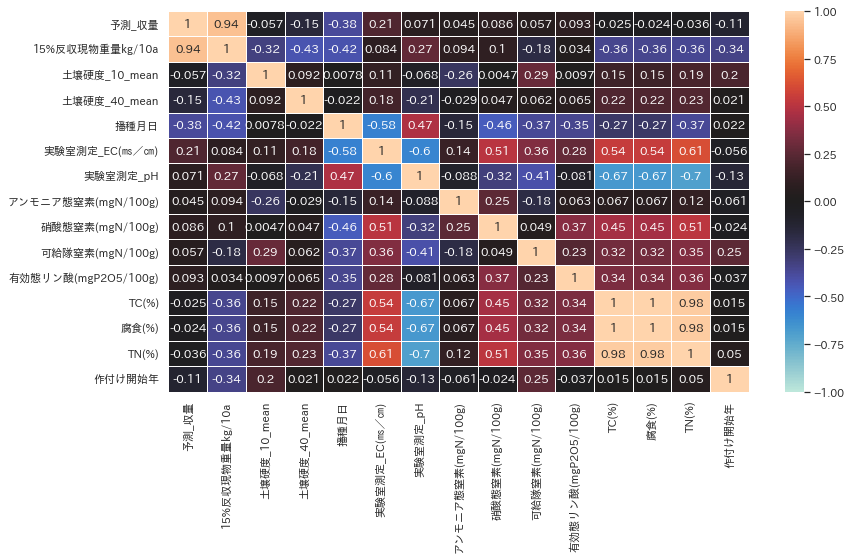

In [12]:
# sns　setするとフォントもデフォルトのsans serifになって文字化けするから、Plotサイズ変える時にフォントも指定する
sns.set(rc = {'figure.figsize':(13,7)},font='IPAexGothic')
sns.heatmap(corr,annot=True, vmax=1, vmin=-1, center=0,linewidths=.5)

## 1-2重回帰

### 1-2-1　参考　Sklearnの全回帰モデル + LGBMRegressor + XGBoost ざっくりモデル比較

In [18]:
pred_data = soil_data[[
        '実験室測定_EC(㎳／㎝)','実験室測定_pH', 'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)','播種月日',
        '可給隊窒素(mgN/100g)', '有効態リン酸(mgP2O5/100g)', 'TC(%)', '腐食(%)', 'TN(%)','作付け開始年','予測_収量']].copy()


In [14]:
X = pred_data.iloc[:,:-1]  
Y = pred_data.iloc[:,-1] 

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from lightgbm import LGBMRegressor
import xgboost as xgb

reg_dict = {"LinearRegression": LinearRegression(),
            "xgboost": xgb.XGBRegressor(),
            "Lightgbm": LGBMRegressor(),
            "Ridge": Ridge(),
            "Lasso": Lasso(),
            "ElasticNet": ElasticNet(), 
            # "Polynomial_deg2": Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression())]),
            "Polynomial_deg3": Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression())]),
            # "Polynomial_deg4": Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression())]),
            # "Polynomial_deg5": Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression())]),
            "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=3),
            # "DecisionTreeRegressor": DecisionTreeRegressor(),
            "RandomForestRegressor": RandomForestRegressor(),
            "SVR": SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
            "GaussianProcessRegressor": GaussianProcessRegressor(),
            "SGDRegressor": SGDRegressor(),
            "MLPRegressor": MLPRegressor(hidden_layer_sizes=(10,10), max_iter=100, early_stopping=True, n_iter_no_change=5),
            "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100), 
            # "PLSRegression": PLSRegression(n_components=10),
            "PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=100, tol=1e-3),
            "TheilSenRegressor": TheilSenRegressor(random_state=0),
            "RANSACRegressor": RANSACRegressor(random_state=0),
            "HistGradientBoostingRegressor": HistGradientBoostingRegressor(),
            "AdaBoostRegressor": AdaBoostRegressor(random_state=0, n_estimators=100),
            "BaggingRegressor": BaggingRegressor(base_estimator=SVR(), n_estimators=10),
            "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
            "VotingRegressor": VotingRegressor([('lr', LinearRegression()), ('rf', RandomForestRegressor(n_estimators=10))]),
            "StackingRegressor": StackingRegressor(estimators=[('lr', RidgeCV()), ('svr', LinearSVR())], final_estimator=RandomForestRegressor(n_estimators=10)),
            "ARDRegression": ARDRegression(),
            "HuberRegressor": HuberRegressor(),
                    }

/opt/conda/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [14]:
from sklearn.model_selection import train_test_split
import random
from sklearn.datasets import make_regression
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """MAPE"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test_size = 0.3  # 分割比率
N_trials = 5  # 試行回数

# 回帰対象のデータを生成

mape_dict = {reg_name:[] for reg_name in reg_dict.keys()}  # 精度の格納庫

for i in range(N_trials):
    print(f"Trial {i+1}")
    random_state = 42
    x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=test_size, random_state=random_state)

    for reg_name, reg in reg_dict.items():
        reg.fit(x_train,y_train)
        y_pred = reg.predict(x_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)  # MAPEを算出
        mape_dict[reg_name].append(mape)  # 格納

# MAPEの平均値でソート
mape_dict_sorted = {key: value for key, value in reversed(sorted(mape_dict.items(), key=lambda x:np.mean(x[1])))}

Trial 1


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Trial 2


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Trial 3


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Trial 4


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Trial 5


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

〜〜〜MAPEは、主に時系列予測や回帰問題における出力層の評価関数としても用いられる。例えば一般のビジネスマンに向けて誤差をパーセント（確率値）で分かりやすく伝えたいときなどで役立つだろう。0に近いほどより良い。なお、数値そのものではなくパーセントという比率を評価する関数であるので、最適化を行うための損失関数としては基本的に使われない。
〜〜〜
https://atmarkit.itmedia.co.jp/ait/articles/2106/09/news028.html

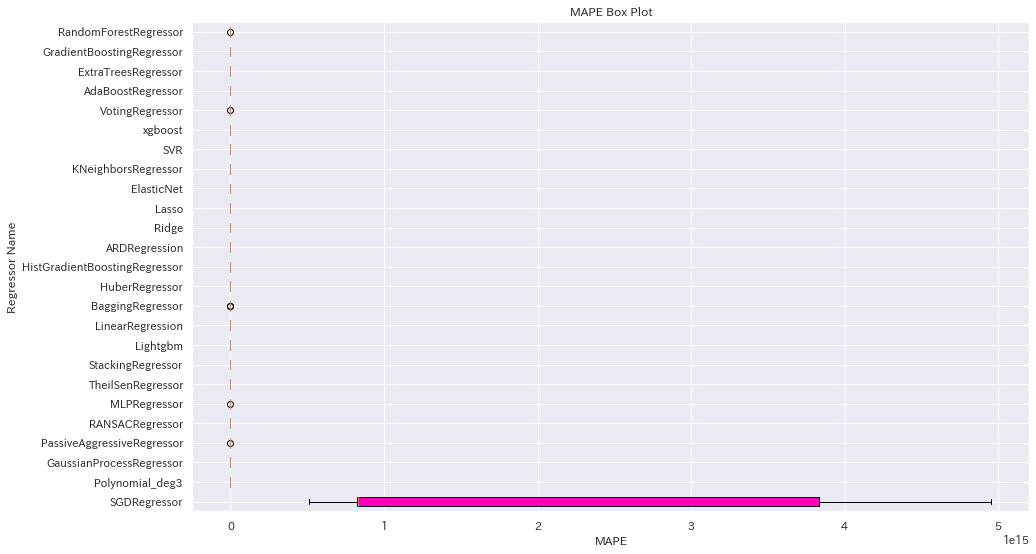

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

plt.rcParams["font.size"] = 18  # フォントサイズを大きくする
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=0, vmax=len(mape_dict)), cmap=plt.get_cmap('gist_rainbow_r'))

plt.figure(figsize=(15,9))
box=plt.boxplot(mape_dict_sorted.values(), vert=False, patch_artist=True,labels=mape_dict_sorted.keys())
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(scalarMap.to_rgba(i))
plt.title("MAPE Box Plot")
plt.xlabel("MAPE")
plt.ylabel("Regressor Name")
plt.show()

* ?　パラメータちゃんとチューンしてないlgbmやxgboostは良い結果が出ない？　
* リッジかラッソで考える
* SGDはSKlearnのフローで10万件以上のデータがあるときに使うそう

※ Oputunaを組み込んだ場合の表かはまた別の機会に考える

* OLS：コスト関数の最小化問題
* リッジ回帰：L2正則化項を追加　過学習の防止
* ラッソ回帰：L1正則化項を追加　不要なパラメータの削除

### 1-2-2　複数の回帰モデルのパイプラインによる解析・評価

土壌でつくったpipeline

In [16]:
'''
ランダムフォレスト、勾配ブースティング、XGBoostの3モデル比較
交差検証 Repeated Kfold
Gridsearch n_estimatorsとmax_depth　
xgbはestimatorsは指定しなくても良いと思う 
'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost
import lightgbm
import joblib


def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)

# build pipeline
def build_pipelines():
    pipelines = {
        # "Ridge":  
        #     Pipeline([#('scl',StandardScaler()),
        #     ('est',Ridge())]),
        # "Lasso": 
        #     Pipeline([#('scl',StandardScaler()),
        #     ('est',Lasso())]),
        
        'Rfr':
            Pipeline([('scl',StandardScaler()),
                    ('est',RandomForestRegressor())]),
        # 'Gbr':
        #     Pipeline([#('scl',StandardScaler()),
        #             ('est',GradientBoostingRegressor())]),

        'Xgb':
            Pipeline([#('scl',StandardScaler()),
                    ('est',xgboost.XGBRegressor())]),
        # 'Lgb':
        #     Pipeline([#('scl',StandardScaler()),
        #             ('est',lightgbm.LGBMRegressor())])
    }
    return(pipelines)



def pipe_score_predict(XX, YY, pred_df):
    train_x, test_x, train_y, test_y = train_test_split(
        XX, YY, test_size=0.3, random_state=42, shuffle=True)

    scores = pd.DataFrame()
    preds_df = pd.DataFrame()
    # learning_curve_score = pd.DataFrame()

    pipelines =  build_pipelines()
    for pipe_name, pipeline in pipelines.items():
        rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
        rf_tune_params = {
                        # 'est__eta': [42],
                        'est__random_state': [42],
                        'est__n_estimators': [8, 16, 32, 64, 128, 256, 512],
                        # 'est__num_leaves':[3,7,15],
                        # 'est__learning_rate':[0.1,0.3,0.5],
                        'est__max_depth': [2,4,6]
                        }
        clf_pipeline = GridSearchCV(pipeline,rf_tune_params, cv=rkf)
        fit_params={
                        # 'est__early_stopping_rounds':5, 
                        # # 'est__eval_metric' : 'rmse', #defaultで自動選択
                        # 'est__eval_set' : [(train_x, train_y)]
                        }
        clf_pipeline.fit(train_x, train_y,**fit_params)
        scores.loc[pipe_name,'train_rmse'] = rmse(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_rmse'] = rmse(test_y, clf_pipeline.predict(test_x))
        scores.loc[pipe_name,'train_r2_score'] = r2_score(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_r2_score'] = r2_score(test_y, clf_pipeline.predict(test_x))

        #3モデルの予測値をｄｆに格納
        best_model = clf_pipeline.best_estimator_
        # preds_df["pred" + pipe_name + target_col] = best_model.predict(pred_df.iloc[:,:-1])

        #bestmodelsのpicle化
        joblib.dump(best_model, f'/workspaces/akita_daizu/pickle/{pipe_name}.pkl', compress=True)
    
        #learningcurveようのパラメータ出力
        # learning_curve_score.loc['train_sizes'],
        # learning_curve_score.loc['train_scores'],
        # learning_curve_score.loc['test_scores'],= learning_curve(estimator=best_model, X=XX, y=YY)
        
    
    #　3モデル予測値の平均を予測値として代入
    # pred_df["pred" + target_col] = preds_df.mean(axis=1)
    return(scores,pred_df)

In [17]:
soil_data_only_yield

NameError: name 'soil_data_only_yield' is not defined

In [ ]:
soil_data_only_yield.columns

Index(['Unnamed: 0', 'id', 'Address', 'CityCode', 'Address_2', 'LandCatego',
       'Area', '耕地面積', 'uniqueID', '作付年_y', 'H23以前_y', '播種月日', 'pred_labels',
       '土壌硬度_1_mean', '土壌硬度_2_mean', '土壌硬度_3_mean', '土壌硬度_4_mean',
       '土壌硬度_5_mean', '土壌硬度_6_mean', '土壌硬度_7_mean', '土壌硬度_8_mean',
       '土壌硬度_9_mean', '土壌硬度_10_mean', '土壌硬度_11_mean', '土壌硬度_12_mean',
       '土壌硬度_13_mean', '土壌硬度_14_mean', '土壌硬度_15_mean', '土壌硬度_16_mean',
       '土壌硬度_17_mean', '土壌硬度_18_mean', '土壌硬度_19_mean', '土壌硬度_20_mean',
       '土壌硬度_21_mean', '土壌硬度_22_mean', '土壌硬度_23_mean', '土壌硬度_24_mean',
       '土壌硬度_25_mean', '土壌硬度_26_mean', '土壌硬度_27_mean', '土壌硬度_28_mean',
       '土壌硬度_29_mean', '土壌硬度_30_mean', '土壌硬度_31_mean', '土壌硬度_32_mean',
       '土壌硬度_33_mean', '土壌硬度_34_mean', '土壌硬度_35_mean', '土壌硬度_36_mean',
       '土壌硬度_37_mean', '土壌硬度_38_mean', '土壌硬度_39_mean', '土壌硬度_40_mean',
       '土壌硬度_41_mean', '土壌硬度_42_mean', '土壌硬度_43_mean', '土壌硬度_44_mean',
       '土壌硬度_45_mean', '土壌硬度_46_mean', '土壌硬度_47_mean', '土壌硬度_48_mean',
  

In [17]:
soil_data_only_yield= soil_data.copy()
soil_data_only_yield = pd.get_dummies(soil_data_only_yield, columns=['土壌種類'])
soil_data_only_yield = soil_data_only_yield.rename(columns={
    '土壌種類_グライ低地土': 'グライ低地土',
    '土壌種類_低位泥炭土': '低位泥炭土',
    '土壌種類_典型普通砂質未熟土': '典型普通砂質未熟土',
    '土壌種類_多腐植質普通非アロフェン質黒ボク土': '多腐植質普通非アロフェン質黒ボク土',
    '土壌種類_淡色普通非アロフェン質黒ボク土': '淡色普通非アロフェン質黒ボク土'
    })

pred_data = soil_data_only_yield[[
        '実験室測定_EC(㎳／㎝)','実験室測定_pH', 'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)','播種月日',
        '可給隊窒素(mgN/100g)', '有効態リン酸(mgP2O5/100g)', 'TN(%)', '作付け開始年',
        # 'グライ低地土','低位泥炭土','典型普通砂質未熟土','多腐植質普通非アロフェン質黒ボク土','淡色普通非アロフェン質黒ボク土',
        '予測_収量']]
XX = pred_data.iloc[:,:-1]  
YY = pred_data.iloc[:,-1] 


target_col = ['予測_収量']

scores, pred_data = pipe_score_predict(XX,YY,pred_data)
scores


NameError: name 'pipe_score_predict' is not defined

In [19]:
# 寄与度の確認
target_cols = [
        '実験室測定_EC(㎳／㎝)','実験室測定_pH', 'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)','播種月日',
        '可給隊窒素(mgN/100g)', '有効態リン酸(mgP2O5/100g)', 'TN(%)', '作付け開始年',
        'グライ低地土','低位泥炭土','典型普通砂質未熟土','多腐植質普通非アロフェン質黒ボク土','土壌種類_淡色普通非アロフェン質黒ボク土','予測_収量']
import glob
preds_df = pd.DataFrame()

best_models_pickle = '/workspaces/akita_daizu/pickle/Rfr.pkl'

classifier = joblib.load(best_models_pickle)
print(classifier)
print(pd.DataFrame.from_dict(dict(zip(target_cols, [[f] for f in classifier._final_estimator.feature_importances_]))))

contribution_scores = pd.DataFrame()

contribution_scores = contribution_scores.append(pd.DataFrame.from_dict(dict(zip(target_cols, [[f] for f in classifier._final_estimator.feature_importances_]))))


    #　3モデル予測値の平均を予測値として代入
# pred_df[target_col] = preds_df.mean(axis=1)

Pipeline(steps=[('scl', StandardScaler()),
                ('est',
                 RandomForestRegressor(max_depth=4, n_estimators=512,
                                       random_state=42))])
   実験室測定_EC(㎳／㎝)  実験室測定_pH  アンモニア態窒素(mgN/100g)  硝酸態窒素(mgN/100g)      播種月日  \
0       0.081118  0.128318            0.065094         0.054227  0.322501   

   可給隊窒素(mgN/100g)  有効態リン酸(mgP2O5/100g)     TN(%)    作付け開始年  
0         0.033801             0.051422  0.261822  0.001696  


In [20]:
best_models_pickle = '/workspaces/akita_daizu/pickle/Xgb.pkl'

classifier = joblib.load(best_models_pickle)
print(classifier)

print(pd.DataFrame.from_dict(dict(zip(target_cols, [[f] for f in classifier._final_estimator.feature_importances_]))))


contribution_scores = contribution_scores.append(pd.DataFrame.from_dict(dict(zip(target_cols, [[f] for f in classifier._final_estimator.feature_importances_]))) )

contribution_scores_reindex = contribution_scores.reset_index()
contribution_scores_reindex = contribution_scores_reindex.drop('index',axis=1)
contribution_scores_reindex = contribution_scores_reindex.rename(index={0:"Xgb", 1:"Rfr"})
contribution_scores_reindex


Pipeline(steps=[('est',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=2, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=16,
                              n_jobs=4, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])
   実験室測定_EC(㎳／㎝)  実験室測定_pH  アンモニア態窒素(mgN/100g)  硝酸態窒素(mgN/100g)      播種

,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),播種月日,可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),TN(%),作付け開始年
Xgb,0.081118,0.128318,0.065094,0.054227,0.322501,0.033801,0.051422,0.261822,0.001696
Rfr,0.084850,0.088407,0.084073,0.136305,0.255543,0.069192,0.095671,0.185958,0.000000


# 3.　重回帰分析 StatsModel

In [16]:
soil_data_only_yield.columns

NameError: name 'soil_data_only_yield' is not defined

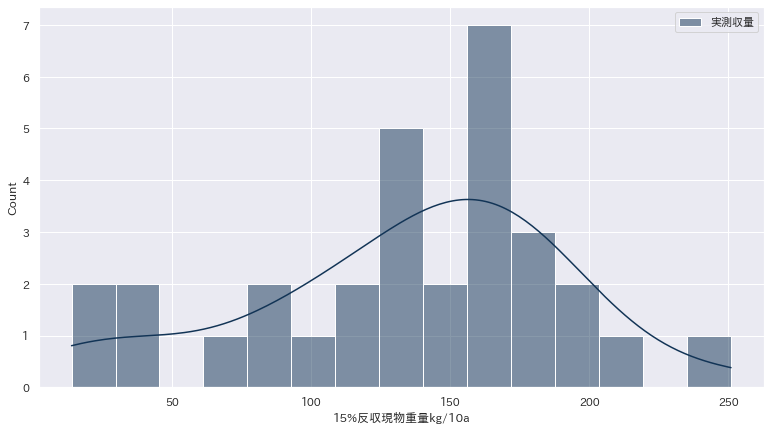

In [249]:
sns.histplot(
    soil_data_only_yield['15%反収現物重量kg/10a'], bins=15, color='#123456', label='実測収量',
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

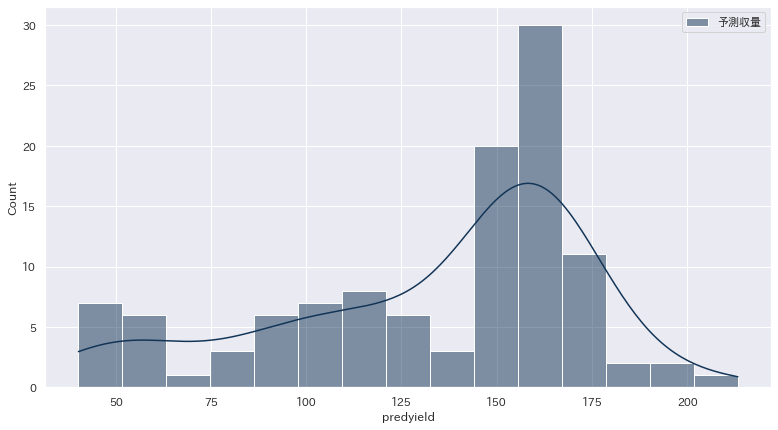

In [250]:
sns.histplot(
    soil_data_only_yield['predyield'], bins=15, color='#123456', label='予測収量',
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

In [ ]:
sns.histplot(
    soil_data_only_yield['ag_predyield_1'], bins=15, color='#123456', label='秋田岐阜_予測収量',
    kde=True
)
plt.legend() # 凡例を表示
plt.show()

In [252]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set() 

StatsModel分析

In [19]:
soil_data_only_yield= soil_data.copy()
soil_data_only_yield.columns

Index(['Unnamed: 0', 'id', 'Address', 'CityCode', 'Address_2', 'LandCatego',
       'Area', '耕地面積', 'uniqueID', '作付年_y', 'H23以前_y', '播種月日', 'pred_labels',
       '土壌硬度_1_mean', '土壌硬度_2_mean', '土壌硬度_3_mean', '土壌硬度_4_mean',
       '土壌硬度_5_mean', '土壌硬度_6_mean', '土壌硬度_7_mean', '土壌硬度_8_mean',
       '土壌硬度_9_mean', '土壌硬度_10_mean', '土壌硬度_11_mean', '土壌硬度_12_mean',
       '土壌硬度_13_mean', '土壌硬度_14_mean', '土壌硬度_15_mean', '土壌硬度_16_mean',
       '土壌硬度_17_mean', '土壌硬度_18_mean', '土壌硬度_19_mean', '土壌硬度_20_mean',
       '土壌硬度_21_mean', '土壌硬度_22_mean', '土壌硬度_23_mean', '土壌硬度_24_mean',
       '土壌硬度_25_mean', '土壌硬度_26_mean', '土壌硬度_27_mean', '土壌硬度_28_mean',
       '土壌硬度_29_mean', '土壌硬度_30_mean', '土壌硬度_31_mean', '土壌硬度_32_mean',
       '土壌硬度_33_mean', '土壌硬度_34_mean', '土壌硬度_35_mean', '土壌硬度_36_mean',
       '土壌硬度_37_mean', '土壌硬度_38_mean', '土壌硬度_39_mean', '土壌硬度_40_mean',
       '土壌硬度_41_mean', '土壌硬度_42_mean', '土壌硬度_43_mean', '土壌硬度_44_mean',
       '土壌硬度_45_mean', '土壌硬度_46_mean', '土壌硬度_47_mean', '土壌硬度_48_mean',
  

In [23]:
soil_data_only_yield= soil_data.copy()
soil_data_only_yield = pd.get_dummies(soil_data_only_yield, columns=['土壌種類'])
soil_data_only_yield = soil_data_only_yield.rename(columns={
    '土壌種類_グライ低地土': 'グライ低地土',
    '土壌種類_低位泥炭土': '低位泥炭土',
    '土壌種類_典型普通砂質未熟土': '典型普通砂質未熟土',
    '土壌種類_多腐植質普通非アロフェン質黒ボク土': '多腐植質普通非アロフェン質黒ボク土',
    '土壌種類_淡色普通非アロフェン質黒ボク土': '淡色普通非アロフェン質黒ボク土'
    })

pred_sel_data = soil_data_only_yield[[
        # '実験室測定_EC(㎳／㎝)',
        '実験室測定_pH', 
        # 'アンモニア態窒素(mgN/100g)', 
        # '硝酸態窒素(mgN/100g)',
        # # '可給隊窒素(mgN/100g)', 
        # '有効態リン酸(mgP2O5/100g)', 
        # '腐食(%)', 
        # # '作付け開始年',
        '播種月日',
        # '作付け開始年',
        # 'グライ低地土',
        # '低位泥炭土',
        # '典型普通砂質未熟土',
        # '多腐植質普通非アロフェン質黒ボク土',
        # '淡色普通非アロフェン質黒ボク土',
        '予測_収量'
        ]]

In [24]:

# statsmodels　での方法重回帰分析について
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # インスタンス
scaler.fit(np.array(pred_sel_data)) # 標準化を適応
df_std = scaler.transform(np.array(pred_sel_data)) # 標準化する
df_std = pd.DataFrame(df_std, columns=pred_sel_data.columns) # データフレームに変換
x_pred = df_std.iloc[:,:-1]  
y_pred = df_std.iloc[:,-1] 

X_con = sm.add_constant(x_pred)

model = sm.OLS(y_pred, X_con) # モデルを作成

# result = model.fit() # モデルを適応
result = model.fit_regularized(L1_wt=1, refit=True)
result.summary() # 結果を確認

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  予測_収量   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     15.82
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           9.01e-07
Time:                        02:20:00   Log-Likelihood:                -146.17
No. Observations:                 113   AIC:                             298.3
Df Residuals:                     111   BIC:                             306.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
実験室測定_pH       0.3198      0.095      3.367      0.001       0.132       0.508
播種月日          -0.5281      0.095     -5.562      0.000      -0.716      -0.340
==============================================================================
Omnibus:                        4.580   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.058
Skew:                          -0.382   Prob(JB):                        0.131
Kurtosis:                       2.472   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

# statsmodels　での方法重回帰分析について
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # インスタンス
scaler.fit(np.array(pred_sel_data)) # 標準化を適応
df_std = scaler.transform(np.array(pred_sel_data)) # 標準化する
df_std = pd.DataFrame(df_std, columns=pred_sel_data.columns) # データフレームに変換
x_pred = df_std.iloc[:,:-1]  
y_pred = df_std.iloc[:,-1] 

X_con = sm.add_constant(x_pred)

model = sm.OLS(y_pred, X_con) # モデルを作成

# result = model.fit() # モデルを適応
result = model.fit_regularized(L1_wt=1, refit=True)
result.summary() # 結果を確認

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  予測_収量   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     6.447
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           7.98e-06
Time:                        02:19:17   Log-Likelihood:                -142.91
No. Observations:                 113   AIC:                             299.8
Df Residuals:                     107   BIC:                             318.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                        0          0        nan        nan           0           0
実験室測定_EC(㎳／㎝)           0.2116      0.122      1.731      0.086      -0.031       0.454
実験室測定_pH                0.5123      0.136      3.768      0.000       0.243       0.782
硝酸態窒素(mgN/100g)        -0.1385      0.105     -1.320      0.190      -0.347       0.070
有効態リン酸(mgP2O5/100g)    -0.1252      0.100     -1.251      0.214      -0.324       0.073
腐食(%)                   0.1570      0.134      1.175      0.243      -0.108       0.422
播種月日                   -0.5613      0.117     -4.785      0.000      -0.794      -0.329
==============================================================================
Omnibus:                        3.859   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.870
Skew:                          -0.422   Prob(JB):                        0.144
Kurtosis:                       2.667   Cond. No.                         4.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

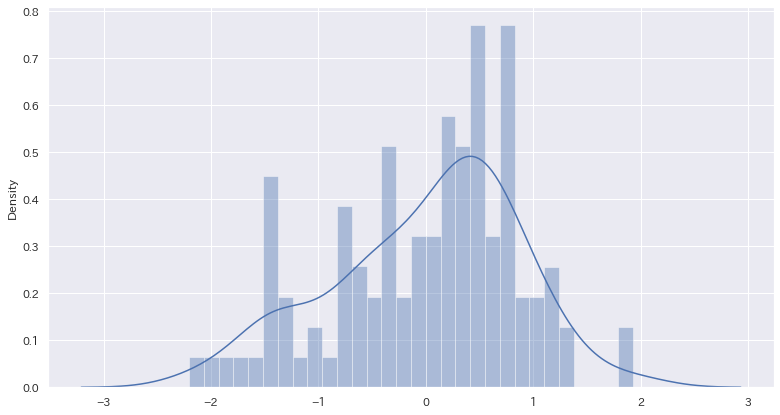

In [247]:
# 回帰分析は残差が正規分布になっていることが望ましいので、プロットして確認
sns.distplot(result.resid,bins=30)


In [248]:
soil_data_only_actual_yield= soil_data.copy()
soil_data_only_actual_yield = soil_data_only_actual_yield.dropna(subset=['15%反収現物重量kg/10a'])
soil_data_only_actual_yield = pd.get_dummies(soil_data_only_actual_yield, columns=['土壌種類'])
soil_data_only_actual_yield = soil_data_only_actual_yield.rename(columns={
    '土壌種類_グライ低地土': 'グライ低地土',
    '土壌種類_低位泥炭土': '低位泥炭土',
    '土壌種類_典型普通砂質未熟土': '典型普通砂質未熟土',
    '土壌種類_多腐植質普通非アロフェン質黒ボク土': '多腐植質普通非アロフェン質黒ボク土',
    '土壌種類_淡色普通非アロフェン質黒ボク土': '淡色普通非アロフェン質黒ボク土'
    })

pred_sel_data = soil_data_only_actual_yield[[
        '実験室測定_EC(㎳／㎝)','実験室測定_pH', 
        'アンモニア態窒素(mgN/100g)', 
        '硝酸態窒素(mgN/100g)',
        '可給隊窒素(mgN/100g)', 
        '有効態リン酸(mgP2O5/100g)', 
        'TN(%)', 
        # '作付け開始年',
        '播種月日',
        # 'グライ低地土',
        # '低位泥炭土',
        # '典型普通砂質未熟土',
        # '多腐植質普通非アロフェン質黒ボク土',
        # '淡色普通非アロフェン質黒ボク土',
        # '予測_収量'
        '15%反収現物重量kg/10a'
        ]]


In [249]:

# statsmodels　での方法重回帰分析について
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # インスタンス
scaler.fit(np.array(pred_sel_data)) # 標準化を適応
df_std = scaler.transform(np.array(pred_sel_data)) # 標準化する
df_std = pd.DataFrame(df_std, columns=pred_sel_data.columns) # データフレームに変換
x_pred = df_std.iloc[:,:-1]  
y_pred = df_std.iloc[:,-1] 

X_con = sm.add_constant(x_pred)

model = sm.OLS(y_pred, X_con) # モデルを作成

# result = model.fit() # モデルを適応
result = model.fit_regularized(L1_wt=1, refit=True)
result.summary() # 結果を確認

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        15%反収現物重量kg/10a   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     3.454
Date:                Mon, 21 Feb 2022   Prob (F-statistic):            0.00930
Time:                        12:43:20   Log-Likelihood:                -31.755
No. Observations:                  31   AIC:                             81.51
Df Residuals:                      23   BIC:                             94.42
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                        0          0        nan        nan           0           0
実験室測定_EC(㎳／㎝)           0.3460      0.275      1.260      0.220      -0.222       0.914
実験室測定_pH                0.2629      0.366      0.719      0.479      -0.494       1.019
アンモニア態窒素(mgN/100g)      0.1204      0.162      0.741      0.466      -0.216       0.456
硝酸態窒素(mgN/100g)        -0.2359      0.230     -1.025      0.316      -0.712       0.240
可給隊窒素(mgN/100g)        -0.1820      0.202     -0.902      0.376      -0.599       0.235
有効態リン酸(mgP2O5/100g)     0.2539      0.174      1.456      0.159      -0.107       0.615
TN(%)                  -0.4994      0.356     -1.402      0.174      -1.236       0.237
播種月日                   -0.5644      0.239     -2.359      0.027      -1.059      -0.069
==============================================================================
Omnibus:                        1.055   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.904
Skew:                           0.164   Prob(JB):                        0.636
Kurtosis:                       2.230   Cond. No.                         7.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ラッソでモデルを適応するためにはfit_regularizedでL1_wt=1を使う必要があるが、このときrefit=Trueも必ず入れないとSummaryが表示されない。理由を考える。

Statsmodelsの解釈の仕方について
https://dataanablog.com/statistical-methods-in-python-for-beginners-multiple-regression-analysis/

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

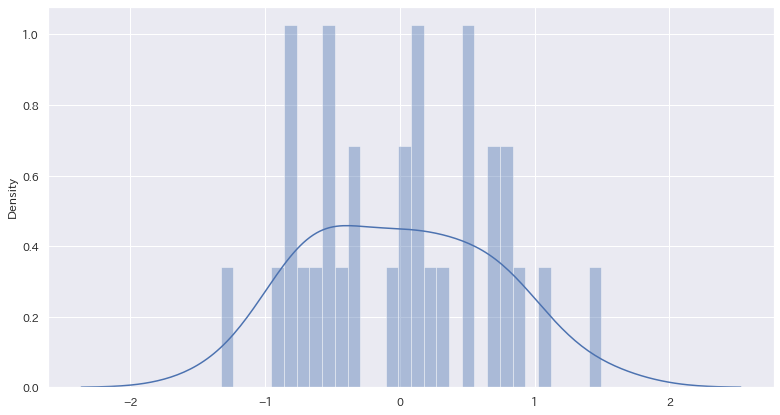

In [250]:
# 回帰分析は残差が正規分布になっていることが望ましいので、プロットして確認
sns.distplot(result.resid,bins=30)


## 4.見える化のための収量増加見込み

見えるか手法でどのようなインプットをしたらどれぐらいアウトプットが増加しそうか、その見込みを表示する  
コメント付きの行だけ抽出、そのコメントがある場所のｐHと腐食を基準値値に変更（ｐH　6.2）腐食（3）
モデルと教師データはどうするか？　土壌で作ったPipeline型の機械学習モデルに戻して計算する。
予測終了がある113データを教師として、113圃場で変更前のｐｈ腐食で予測モデルを作ってから変更後のｐｈと腐食で予測して差分を計算。

In [349]:
soil_data = pd.read_csv('/workspaces/akita_daizu/474+113+コメントkml化する前.csv')

In [368]:
'''
ランダムフォレスト、勾配ブースティング、XGBoostの3モデル比較
交差検証 Repeated Kfold
Gridsearch n_estimatorsとmax_depth　
xgbはestimatorsは指定しなくても良いと思う 
'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost
import lightgbm
import joblib


def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=True)

# build pipeline
def build_pipelines():
    pipelines = {
        "Ridge":  
            Pipeline([#('scl',StandardScaler()),
            ('est',Ridge())]),
        "Lasso": 
            Pipeline([#('scl',StandardScaler()),
            ('est',Lasso())])
        
        # 'Rfr':
        #     Pipeline([('scl',StandardScaler()),
        #             ('est',RandomForestRegressor())]),
        # 'Gbr':
        #     Pipeline([#('scl',StandardScaler()),
        #             ('est',GradientBoostingRegressor())]),

        # 'Xgb':
        #     Pipeline([#('scl',StandardScaler()),
        #             ('est',xgboost.XGBRegressor())]),
        # 'Lgb':
        #     Pipeline([#('scl',StandardScaler()),
        #             ('est',lightgbm.LGBMRegressor())])
    }
    return(pipelines)



def pipe_score_predict(XX, YY, pred_df):
    train_x, test_x, train_y, test_y = train_test_split(
        XX, YY, test_size=0.3, random_state=42, shuffle=True)

    scores = pd.DataFrame()
    preds_df = pd.DataFrame()
    # learning_curve_score = pd.DataFrame()

    pipelines =  build_pipelines()
    for pipe_name, pipeline in pipelines.items():
        rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
        rf_tune_params = {
                        # 'est__eta': [42],
                        'est__random_state': [42],
                        # 'est__n_estimators': [8, 16, 32, 64, 128, 256, 512],
                        # 'est__num_leaves':[3,7,15],
                        # 'est__learning_rate':[0.1,0.3,0.5],
                        # 'est__max_depth': [2,4,6]
                        }
        clf_pipeline = GridSearchCV(pipeline,rf_tune_params, cv=rkf)
        fit_params={
                        # 'est__early_stopping_rounds':5, 
                        # # 'est__eval_metric' : 'rmse', #defaultで自動選択
                        # 'est__eval_set' : [(train_x, train_y)]
                        }
        clf_pipeline.fit(train_x, train_y,**fit_params)
        scores.loc[pipe_name,'train_rmse'] = rmse(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_rmse'] = rmse(test_y, clf_pipeline.predict(test_x))
        scores.loc[pipe_name,'train_r2_score'] = r2_score(train_y, clf_pipeline.predict(train_x))
        scores.loc[pipe_name,'test_r2_score'] = r2_score(test_y, clf_pipeline.predict(test_x))

        #3モデルの予測値をｄｆに格納
        best_model = clf_pipeline.best_estimator_
        # preds_df["pred" + pipe_name + target_col] = best_model.predict(pred_df.iloc[:,:-1])

        #bestmodelsのpicle化
        joblib.dump(best_model, f'/workspaces/akita_daizu/pickle/{pipe_name}.pkl', compress=True)
    
        #learningcurveようのパラメータ出力
        # learning_curve_score.loc['train_sizes'],
        # learning_curve_score.loc['train_scores'],
        # learning_curve_score.loc['test_scores'],= learning_curve(estimator=best_model, X=XX, y=YY)
        
    
    #　3モデル予測値の平均を予測値として代入
    # pred_df["pred" + target_col] = preds_df.mean(axis=1)
    return(scores,pred_df)

In [363]:
soil_data_only_yield= soil_data.copy()
soil_data_only_yield = pd.get_dummies(soil_data_only_yield, columns=['土壌種類'])
soil_data_only_yield = soil_data_only_yield.rename(columns={
    '土壌種類_グライ低地土': 'グライ低地土',
    '土壌種類_低位泥炭土': '低位泥炭土',
    '土壌種類_典型普通砂質未熟土': '典型普通砂質未熟土',
    '土壌種類_多腐植質普通非アロフェン質黒ボク土': '多腐植質普通非アロフェン質黒ボク土',
    '土壌種類_淡色普通非アロフェン質黒ボク土': '淡色普通非アロフェン質黒ボク土'
    })

In [364]:
soil_data_only_yield['予測_腐食Humus']

0      2.496
1      0.906
2      1.697
3      4.806
4      2.544
       ...  
469    6.491
470    4.410
471    1.818
472    3.927
473    5.429
Name: 予測_腐食Humus, Length: 474, dtype: float64

In [365]:
# コメントが入っている行だけ抽出して　そのコメントの文字に対して　指定した行に値を入れる
# nan含んでるとTrueFlase以外にNanも出てきてBoolでテーブル選択できないので引数追加
soil_data_only_yield['改善pH'] = pd.Series()
soil_data_only_yield['改善pH'][soil_data_only_yield['COMMENT'].str.contains('pH', na=False)] = 6.2
soil_data_only_yield['改善腐食'] = pd.Series()
soil_data_only_yield['改善腐食'][soil_data_only_yield['COMMENT'].str.contains('腐食', na=False)] = 3

# Nan埋
# これで改善ｐHに改善ちと元の値も入力された
for index, row in soil_data_only_yield[['予測_pH1', '改善pH','予測_腐食Humus','改善腐食']].iterrows():

    if pd.isnull(row["改善pH"]) :
        soil_data_only_yield['改善pH'][index] =row['予測_pH1']
    if  pd.isnull(row["改善腐食"]) :
        soil_data_only_yield['改善腐食'][index] = row['予測_腐食Humus']

/tmp/ipykernel_387/2168402084.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  soil_data_only_yield['改善pH'] = pd.Series()
/tmp/ipykernel_387/2168402084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_data_only_yield['改善pH'][soil_data_only_yield['COMMENT'].str.contains('pH', na=False)] = 6.2
/tmp/ipykernel_387/2168402084.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  soil_data_only_yield['改善腐食'] = pd.Series()
/tmp/ipykernel_387/2168402084.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [366]:
soil_data.columns

Index(['Unnamed: 0', 'id', 'Address', 'CityCode', 'Address_2', 'LandCatego',
       'Area', '耕地面積', 'uniqueID', '作付年_y', 'H23以前_y', '播種月日', 'pred_labels',
       '土壌硬度_1_mean', '土壌硬度_2_mean', '土壌硬度_3_mean', '土壌硬度_4_mean',
       '土壌硬度_5_mean', '土壌硬度_6_mean', '土壌硬度_7_mean', '土壌硬度_8_mean',
       '土壌硬度_9_mean', '土壌硬度_10_mean', '土壌硬度_11_mean', '土壌硬度_12_mean',
       '土壌硬度_13_mean', '土壌硬度_14_mean', '土壌硬度_15_mean', '土壌硬度_16_mean',
       '土壌硬度_17_mean', '土壌硬度_18_mean', '土壌硬度_19_mean', '土壌硬度_20_mean',
       '土壌硬度_21_mean', '土壌硬度_22_mean', '土壌硬度_23_mean', '土壌硬度_24_mean',
       '土壌硬度_25_mean', '土壌硬度_26_mean', '土壌硬度_27_mean', '土壌硬度_28_mean',
       '土壌硬度_29_mean', '土壌硬度_30_mean', '土壌硬度_31_mean', '土壌硬度_32_mean',
       '土壌硬度_33_mean', '土壌硬度_34_mean', '土壌硬度_35_mean', '土壌硬度_36_mean',
       '土壌硬度_37_mean', '土壌硬度_38_mean', '土壌硬度_39_mean', '土壌硬度_40_mean',
       '土壌硬度_41_mean', '土壌硬度_42_mean', '土壌硬度_43_mean', '土壌硬度_44_mean',
       '土壌硬度_45_mean', '土壌硬度_46_mean', '土壌硬度_47_mean', '土壌硬度_48_mean',
  

In [369]:
pred_data = soil_data_only_yield[[
    '予測_pH1', '予測_EC', '予測_アンモニア態窒素', '予測_硝酸態窒素',
    '予測_可給態窒素', '予測_可給態リン酸', '予測_全炭素', '予測_腐食Humus', '予測_全窒素', '作付け開始年',
    # 'グライ低地土','低位泥炭土','典型普通砂質未熟土','多腐植質普通非アロフェン質黒ボク土','淡色普通非アロフェン質黒ボク土',
    '予測_収量']].copy()
pred_data = pred_data.dropna()

XX = pred_data.iloc[:,:-1]  
YY = pred_data.iloc[:,-1] 


target_col = ['予測_収量']

scores, pred_data = pipe_score_predict(XX,YY,pred_data)
scores

,train_rmse,test_rmse,train_r2_score,test_r2_score
Ridge,1682.742225,1263.656329,0.09176,-0.186809
Lasso,1694.062761,1272.070090,0.08565,-0.194711


決定木系だと無理があるかも？　線形回帰にする
	train_rmse	test_rmse	train_r2_score	test_r2_score  
Rfr	1101.603592	1368.931553	0.405422	-0.285682  
Xgb	994.367643	1707.046977	0.463302	-0.603235  

In [328]:
pred_data

,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),播種月日,可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),腐食(%),作付け開始年,予測_収量
0,0.041,7.26,1.53,0.62,704.0,4.40,18.5,1.72,2011.0,163.169406
1,0.035,6.42,1.55,1.36,704.0,2.30,11.0,0.46,2011.0,55.456022
2,0.029,6.56,1.58,0.13,704.0,3.85,8.0,0.62,2011.0,88.648438
3,0.025,6.87,1.22,0.11,704.0,4.43,15.5,0.79,2011.0,164.194410
4,0.042,7.03,1.20,0.32,704.0,4.76,40.4,1.41,2011.0,147.590538
...,...,...,...,...,...,...,...,...,...,...
108,0.047,6.04,2.27,0.46,627.0,8.55,39.5,7.46,2011.0,171.237964
109,0.050,5.50,1.86,1.22,627.0,2.98,18.3,7.09,2011.0,154.465816
110,0.048,6.09,1.79,0.39,627.0,7.03,60.2,6.69,2011.0,169.097911
111,0.048,6.30,1.76,0.59,627.0,8.27,51.7,5.50,2011.0,158.570285


In [338]:
import os

preds_df = pd.DataFrame()
target_col = '改善時予測_収量'
kaizen_pred_data[target_col] = pd.Series()
pred_data = soil_data_only_yield[[
        '実験室測定_EC(㎳／㎝)','実験室測定_pH', 'アンモニア態窒素(mgN/100g)', '硝酸態窒素(mgN/100g)','播種月日',
        '可給隊窒素(mgN/100g)', '有効態リン酸(mgP2O5/100g)', '改善腐食', '作付け開始年'
        # 'グライ低地土','低位泥炭土','典型普通砂質未熟土','多腐植質普通非アロフェン質黒ボク土','淡色普通非アロフェン質黒ボク土',
        ]]

best_models_pickle = "/workspaces/akita_daizu/pickle/Rfr.pkl"

pipe_name = os.path.basename(best_models_pickle).split('.', 1)[0]
estimator = joblib.load(best_models_pickle)
kaizen_pred_data[target_col] = estimator.predict(pred_data)

/tmp/ipykernel_387/1138001020.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  kaizen_pred_data[target_col] = pd.Series()
/tmp/ipykernel_387/1138001020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaizen_pred_data[target_col] = pd.Series()
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 改善腐食
Feature names seen at fit time, yet now missing:
- 腐食(%)

  warnings.warn(message, FutureWarning)
/tmp/ipykernel_387/1138001020.py:16: SettingWithCopyWarni

In [339]:
kaizen_pred_data

,実験室測定_EC(㎳／㎝),実験室測定_pH,アンモニア態窒素(mgN/100g),硝酸態窒素(mgN/100g),播種月日,可給隊窒素(mgN/100g),有効態リン酸(mgP2O5/100g),改善腐食,作付け開始年,改善時予測_収量
0,0.041,7.26,1.53,0.62,704.0,4.40,18.5,1.72,2011.0,161.565941
1,0.035,6.42,1.55,1.36,704.0,2.30,11.0,3.00,2011.0,124.136142
2,0.029,6.56,1.58,0.13,704.0,3.85,8.0,3.00,2011.0,129.809921
3,0.025,6.87,1.22,0.11,704.0,4.43,15.5,0.79,2011.0,153.572878
4,0.042,7.03,1.20,0.32,704.0,4.76,40.4,1.41,2011.0,160.662718
...,...,...,...,...,...,...,...,...,...,...
108,0.047,6.04,2.27,0.46,627.0,8.55,39.5,7.46,2011.0,129.239004
109,0.050,5.50,1.86,1.22,627.0,2.98,18.3,7.09,2011.0,143.532192
110,0.048,6.09,1.79,0.39,627.0,7.03,60.2,6.69,2011.0,134.070858
111,0.048,6.30,1.76,0.59,627.0,8.27,51.7,5.50,2011.0,141.570012
